In [39]:
import pandas as pd
import numpy as np

In [40]:
df = pd.read_csv('C:/Users/4/Desktop/정하협/human.csv', encoding='cp949')
df.head()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,성별,자본 이득,자본 손실,주당 시간,모국
0,H20001,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,H20002,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,H20003,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,H20004,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,H20005,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [41]:
mdf = df.copy()

In [42]:
mdf = mdf.dropna(subset=['노동 계급', '직업', '모국'])
mdf.shape

(30162, 15)

In [43]:
obj = ['노동 계급', '학력', '혼인 상태', '직업', '관계', '인종', '성별', '모국']
mdf[obj] = mdf[obj].apply(lambda x: x.astype('category').cat.codes)
mdf.head()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,성별,자본 이득,자본 손실,주당 시간,모국
0,H20001,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38
1,H20002,50,4,83311,9,13,2,3,0,4,1,0,0,13,38
2,H20003,38,2,215646,11,9,0,5,1,4,1,0,0,40,38
3,H20004,53,2,234721,1,7,2,5,0,2,1,0,0,40,38
4,H20005,28,2,338409,9,13,2,9,5,2,0,0,0,40,4


In [44]:
corr = mdf.corr()
a = corr.iloc[9, :]
a

나이        0.081993
노동 계급     0.074973
fnlwgt    0.025362
학력       -0.027888
교육 수      0.006157
혼인 상태    -0.119813
직업        0.062313
관계       -0.584876
인종        0.089186
성별        1.000000
자본 이득     0.048814
자본 손실     0.047011
주당 시간     0.231268
모국        0.000618
Name: 성별, dtype: float64

In [49]:
pip install --upgrade --user matplotlib

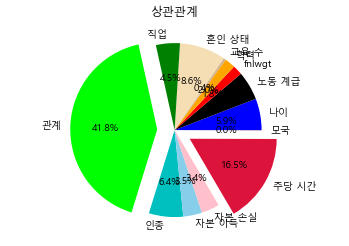

In [62]:
import matplotlib.pyplot as plt
plt.rc('font', family = 'Malgun Gothic')
plt.title('상관관계')
size = [81993, 74973, 25362, 27888, 6157, 119813, 62313, 584876, 89186, 48814, 47011, 231268, 618]
label= ['나이', '노동 계급', 'fnlwgt', '학력', '교육 수', '혼인 상태', '직업', '관계', '인종', '자본 이득', '자본 손실', '주당 시간', '모국']
color = ['b', 'k', 'r', 'orange', 'tan', 'wheat', 'g', 'lime', 'c', 'skyblue', 'pink', 'crimson', 'purple']
plt.axis('equal')
plt.pie(size, labels = label, autopct = '%.1f%%', explode = (0, 0, 0, 0, 0, 0, 0, 0.2, 0, 0, 0, 0.2, 0), colors = color)

plt.show()

In [7]:
mdf.loc[(mdf['주당 시간'] >= 1) & (mdf['주당 시간'] < 20), '시간별'] = '조금범'
mdf.loc[(mdf['주당 시간'] >= 20) & (mdf['주당 시간'] < 40), '시간별'] = '쫌범'
mdf.loc[(mdf['주당 시간'] >= 40) & (mdf['주당 시간'] < 50), '시간별'] = '꾀범'
mdf.loc[(mdf['주당 시간'] >= 50), '시간별'] = '많이범'

In [8]:
mdf.loc[(mdf['관계'] == 0), '관계별'] = '무'
mdf.loc[(mdf['관계'] == 1), '관계별'] = '슨'
mdf.loc[(mdf['관계'] == 2) | (mdf['관계'] == 3), '관계별'] = '관'
mdf.loc[(mdf['관계'] == 4), '관계별'] = '계'
mdf.loc[(mdf['관계'] == 5), '관계별'] = '지'

In [9]:
mdf_tl = pd.get_dummies(mdf['시간별'])
mdf_rhks = pd.get_dummies(mdf['관계별'])
mdf = pd.concat([mdf, mdf_tl], axis=1)
mdf = pd.concat([mdf, mdf_rhks], axis=1)
del mdf['시간별']
del mdf['관계별']

In [10]:
mdf.head()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,...,모국,꾀범,많이범,조금범,쫌범,계,관,무,슨,지
0,H20001,39,5,77516,9,13,4,0,1,4,...,38,1,0,0,0,0,0,0,1,0
1,H20002,50,4,83311,9,13,2,3,0,4,...,38,0,0,1,0,0,0,1,0,0
2,H20003,38,2,215646,11,9,0,5,1,4,...,38,1,0,0,0,0,0,0,1,0
3,H20004,53,2,234721,1,7,2,5,0,2,...,38,1,0,0,0,0,0,1,0,0
4,H20005,28,2,338409,9,13,2,9,5,2,...,4,1,0,0,0,0,0,0,0,1


In [11]:
from sklearn.model_selection import train_test_split  
X = mdf.drop(['아이디','성별'], axis=1) 
Y = mdf['성별']                    
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [12]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=6, random_state=0)

In [13]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=0)

In [14]:
display(tree.score(X_test, y_test))

0.8318525394510012

In [15]:
import xgboost as xgb
from xgboost import plot_importance
#import pan
import numpy as np

In [16]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [17]:
params = {'max_depth':3,
          'eta':0.1,
          'objective':'binary:logistic',
          'eval_metric':'logloss',
          'early_stoppings':100
         }
num_rounds = 400

In [18]:
wlist = [(dtrain, 'train'),(dtest, 'eval')]
# 하이퍼 파라미터와 early stoppinig 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[12:41:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { early_stoppings } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.64407	eval-logloss:0.64343
[1]	train-logloss:0.60392	eval-logloss:0.60275
[2]	train-logloss:0.57052	eval-logloss:0.56893
[3]	train-logloss:0.54238	eval-logloss:0.54045
[4]	train-logloss:0.51846	eval-logloss:0.51623
[5]	train-logloss:0.49796	eval-logloss:0.49548
[6]	train-logloss:0.48012	eval-logloss:0.47721
[7]	train-logloss:0.46453	eval-logloss:0.46123
[8]	train-logloss:0.45088	eval-logloss:0.44734
[9]	train-logloss:0.43884	eval-logloss:0.43489
[10]	train-logloss:0.42637	eval-logloss:0.42244
[11]	train-logloss:0.41556	eval-logloss:0.41164
[12]	train-logloss:0.40673	eval-logloss:0

[162]	train-logloss:0.27959	eval-logloss:0.28331
[163]	train-logloss:0.27926	eval-logloss:0.28299
[164]	train-logloss:0.27911	eval-logloss:0.28301
[165]	train-logloss:0.27907	eval-logloss:0.28298
[166]	train-logloss:0.27902	eval-logloss:0.28293
[167]	train-logloss:0.27894	eval-logloss:0.28300
[168]	train-logloss:0.27891	eval-logloss:0.28301
[169]	train-logloss:0.27884	eval-logloss:0.28300
[170]	train-logloss:0.27877	eval-logloss:0.28300
[171]	train-logloss:0.27866	eval-logloss:0.28304
[172]	train-logloss:0.27852	eval-logloss:0.28303
[173]	train-logloss:0.27841	eval-logloss:0.28307
[174]	train-logloss:0.27829	eval-logloss:0.28312
[175]	train-logloss:0.27815	eval-logloss:0.28312
[176]	train-logloss:0.27806	eval-logloss:0.28307
[177]	train-logloss:0.27794	eval-logloss:0.28305
[178]	train-logloss:0.27772	eval-logloss:0.28304
[179]	train-logloss:0.27770	eval-logloss:0.28302
[180]	train-logloss:0.27759	eval-logloss:0.28301
[181]	train-logloss:0.27753	eval-logloss:0.28303
[182]	train-logloss:

[330]	train-logloss:0.26499	eval-logloss:0.28054
[331]	train-logloss:0.26489	eval-logloss:0.28048
[332]	train-logloss:0.26488	eval-logloss:0.28049
[333]	train-logloss:0.26472	eval-logloss:0.28047
[334]	train-logloss:0.26466	eval-logloss:0.28042
[335]	train-logloss:0.26459	eval-logloss:0.28044
[336]	train-logloss:0.26455	eval-logloss:0.28043
[337]	train-logloss:0.26446	eval-logloss:0.28042
[338]	train-logloss:0.26445	eval-logloss:0.28044
[339]	train-logloss:0.26435	eval-logloss:0.28042
[340]	train-logloss:0.26428	eval-logloss:0.28040
[341]	train-logloss:0.26425	eval-logloss:0.28041
[342]	train-logloss:0.26422	eval-logloss:0.28041
[343]	train-logloss:0.26419	eval-logloss:0.28045
[344]	train-logloss:0.26418	eval-logloss:0.28046
[345]	train-logloss:0.26410	eval-logloss:0.28047
[346]	train-logloss:0.26397	eval-logloss:0.28046
[347]	train-logloss:0.26393	eval-logloss:0.28047
[348]	train-logloss:0.26386	eval-logloss:0.28048
[349]	train-logloss:0.26382	eval-logloss:0.28046
[350]	train-logloss:

In [19]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10], 3))

preds = [1 if x > 0.5 else 0 for x in pred_probs]

predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨
[0.496 0.35  1.    0.948 1.    1.    0.222 1.    1.    1.   ]


In [20]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [21]:
get_clf_eval(y_test, preds)

오차행렬
[[1943  456]
 [ 651 4491]]
정확도: 0.8532, 정밀도: 0.9078, 재현율: 0.8734


In [22]:
new = pd.read_csv('C:/Users/4/Desktop/정하협/human_new.csv', encoding='cp949')
new.head()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,자본 이득,자본 손실,주당 시간,모국
0,H00001,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,0,0,40,United-States
1,H00002,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,0,0,50,United-States
2,H00003,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,0,0,40,United-States
3,H00004,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,7688,0,40,United-States
4,H00005,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,0,0,30,United-States


In [23]:
obj1 = ['노동 계급', '학력', '혼인 상태', '직업', '관계', '인종', '모국']
new[obj1] = new[obj1].apply(lambda x: x.astype('category').cat.codes)
new.head()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,자본 이득,자본 손실,주당 시간,모국
0,H00001,25,3,226802,1,7,4,6,3,2,0,0,40,37
1,H00002,38,3,89814,11,9,2,4,0,4,0,0,50,37
2,H00003,28,1,336951,7,12,2,10,0,4,0,0,40,37
3,H00004,44,3,160323,15,10,2,6,0,2,7688,0,40,37
4,H00005,18,-1,103497,15,10,4,-1,3,4,0,0,30,37


In [24]:
ndf = new.copy()
ndf.head()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,자본 이득,자본 손실,주당 시간,모국
0,H00001,25,3,226802,1,7,4,6,3,2,0,0,40,37
1,H00002,38,3,89814,11,9,2,4,0,4,0,0,50,37
2,H00003,28,1,336951,7,12,2,10,0,4,0,0,40,37
3,H00004,44,3,160323,15,10,2,6,0,2,7688,0,40,37
4,H00005,18,-1,103497,15,10,4,-1,3,4,0,0,30,37


In [25]:
ndf.loc[(ndf['주당 시간'] >= 1) & (ndf['주당 시간'] < 20), '시간별'] = '조금범'
ndf.loc[(ndf['주당 시간'] >= 20) & (ndf['주당 시간'] < 40), '시간별'] = '쫌범'
ndf.loc[(ndf['주당 시간'] >= 40) & (ndf['주당 시간'] < 50), '시간별'] = '꾀범'
ndf.loc[(ndf['주당 시간'] >= 50), '시간별'] = '많이범'

In [26]:
ndf.loc[(ndf['관계'] == 0), '관계별'] = '무'
ndf.loc[(ndf['관계'] == 1), '관계별'] = '슨'
ndf.loc[(ndf['관계'] == 2) | (ndf['관계'] == 3), '관계별'] = '관'
ndf.loc[(ndf['관계'] == 4), '관계별'] = '계'
ndf.loc[(ndf['관계'] == 5), '관계별'] = '지'

In [27]:
ndf_tl = pd.get_dummies(ndf['시간별'])
ndf_rhks = pd.get_dummies(ndf['관계별'])
ndf = pd.concat([ndf, ndf_tl], axis=1)
ndf = pd.concat([ndf, ndf_rhks], axis=1)
del ndf['시간별']
del ndf['관계별']

In [28]:
ndf.head()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,...,모국,꾀범,많이범,조금범,쫌범,계,관,무,슨,지
0,H00001,25,3,226802,1,7,4,6,3,2,...,37,1,0,0,0,0,1,0,0,0
1,H00002,38,3,89814,11,9,2,4,0,4,...,37,0,1,0,0,0,0,1,0,0
2,H00003,28,1,336951,7,12,2,10,0,4,...,37,1,0,0,0,0,0,1,0,0
3,H00004,44,3,160323,15,10,2,6,0,2,...,37,1,0,0,0,0,0,1,0,0
4,H00005,18,-1,103497,15,10,4,-1,3,4,...,37,0,0,0,1,0,1,0,0,0


In [30]:
ndf['성별'] = tree.predict(ndf.loc[:,'나이':'지'])
ndf.head()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,...,꾀범,많이범,조금범,쫌범,계,관,무,슨,지,성별
0,H00001,25,3,226802,1,7,4,6,3,2,...,1,0,0,0,0,1,0,0,0,1
1,H00002,38,3,89814,11,9,2,4,0,4,...,0,1,0,0,0,0,1,0,0,1
2,H00003,28,1,336951,7,12,2,10,0,4,...,1,0,0,0,0,0,1,0,0,1
3,H00004,44,3,160323,15,10,2,6,0,2,...,1,0,0,0,0,0,1,0,0,1
4,H00005,18,-1,103497,15,10,4,-1,3,4,...,0,0,0,1,0,1,0,0,0,1


In [32]:
dtest_ndf = xgb.DMatrix(data=ndf.loc[:,'나이':'지'])

In [33]:
ndf['성별'] = xgb_model.predict(dtest_ndf)

In [34]:
str = ['아이디','성별']
ndf[str].head()

,아이디,성별
0,H00001,0.826606
1,H00002,0.999967
2,H00003,0.999952
3,H00004,0.999963
4,H00005,0.480131


In [35]:
ndf_rename = ndf.rename(columns={'아이디':'ID', '성별':'SEX'})
ndf_rename.head()

,ID,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,...,꾀범,많이범,조금범,쫌범,계,관,무,슨,지,SEX
0,H00001,25,3,226802,1,7,4,6,3,2,...,1,0,0,0,0,1,0,0,0,0.826606
1,H00002,38,3,89814,11,9,2,4,0,4,...,0,1,0,0,0,0,1,0,0,0.999967
2,H00003,28,1,336951,7,12,2,10,0,4,...,1,0,0,0,0,0,1,0,0,0.999952
3,H00004,44,3,160323,15,10,2,6,0,2,...,1,0,0,0,0,0,1,0,0,0.999963
4,H00005,18,-1,103497,15,10,4,-1,3,4,...,0,0,0,1,0,1,0,0,0,0.480131


In [36]:
str = ['ID','SEX']
ndf_rename[str].head()

,ID,SEX
0,H00001,0.826606
1,H00002,0.999967
2,H00003,0.999952
3,H00004,0.999963
4,H00005,0.480131


In [37]:
ndf_rename[str].to_csv('submission_human.csv', encoding='cp949', index=False)